In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Data Akun


### Load data dan data understanding

In [2]:
df_accounts = pd.read_csv('accounts.csv')
df_accounts.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [3]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


### Data Cleaning

In [4]:
df_accounts.isnull().sum()

,0
account,0
sector,0
year_established,0
revenue,0
employees,0
office_location,0
subsidiary_of,70


In [5]:
df_accounts.duplicated().sum()

np.int64(0)

In [6]:
df_accounts['subsidiary_of'] = df_accounts['subsidiary_of'].fillna(0)
df_accounts.head()
df_accounts['subsidiary_of'].isnull().sum()

np.int64(0)

In [7]:
df_accounts.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,0
1,Betasoloin,medical,1999,251.41,495,United States,0
2,Betatech,medical,1986,647.18,1185,Kenya,0
3,Bioholding,medical,2012,587.34,1356,Philipines,0
4,Bioplex,medical,1991,326.82,1016,United States,0


In [8]:
df_accounts = df_accounts.drop('subsidiary_of', axis=1)
df_accounts.head()

,account,sector,year_established,revenue,employees,office_location
0,Acme Corporation,technolgy,1996,1100.04,2822,United States
1,Betasoloin,medical,1999,251.41,495,United States
2,Betatech,medical,1986,647.18,1185,Kenya
3,Bioholding,medical,2012,587.34,1356,Philipines
4,Bioplex,medical,1991,326.82,1016,United States


### Visualisasi Analisis based on Sector untuk ngecek revenue terbesar

/tmp/ipython-input-3371350131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_revenue.index, y=sector_revenue.values, palette='viridis')


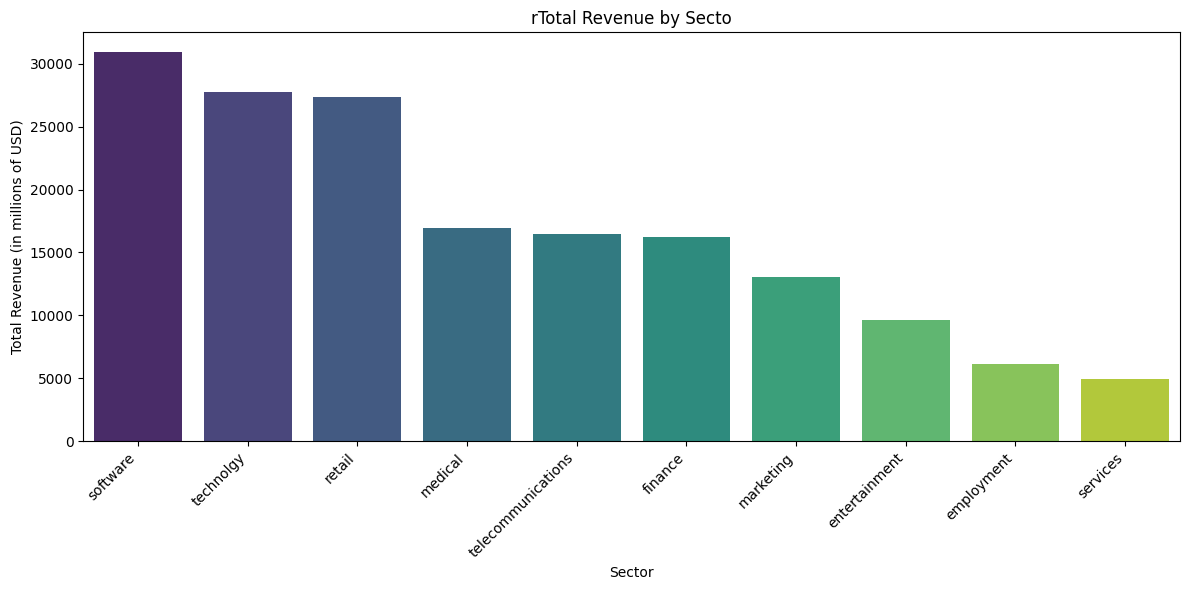

Sector with the largest revenue: software with 30,950.45 million USD


In [9]:
sector_revenue = df_accounts.groupby('sector')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_revenue.index, y=sector_revenue.values, palette='viridis')
plt.title('rTotal Revenue by Secto')
plt.xlabel('Sector')
plt.ylabel('Total Revenue (in millions of USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Sector with the largest revenue: {sector_revenue.index[0]} with {sector_revenue.values[0]:,.2f} million USD")

# Data Dict

In [10]:
df_dict = pd.read_csv('data_dictionary.csv')
df_dict.head()

,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees


In [11]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        21 non-null     object
 1   Field        21 non-null     object
 2   Description  21 non-null     object
dtypes: object(3)
memory usage: 636.0+ bytes


In [12]:
df_dict.isnull().sum()

,0
Table,0
Field,0
Description,0


# Data Produk

In [13]:
df_products = pd.read_csv('products.csv')
df_products.head()

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [14]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [15]:
df_products.isnull().sum()

,0
product,0
series,0
sales_price,0


In [16]:
df_products.duplicated().sum()

np.int64(0)

# Data Sales

In [17]:
df_sales = pd.read_csv('sales_pipeline.csv')
df_sales.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [18]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [19]:
df_sales.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,1425
deal_stage,0
engage_date,500
close_date,2089
close_value,2089


In [20]:
df_sales.duplicated().sum()

np.int64(0)

In [21]:
df_sales['account'] = df_sales['account'].fillna('Unknown')
df_sales['engage_date'] = df_sales['engage_date'].fillna('Unknown')
df_sales['close_date'] = df_sales['close_date'].fillna('Unknown')
df_sales['close_value'] = df_sales['close_value'].fillna(0)

print("Null values after filling:")
print(df_sales.isnull().sum())

Null values after filling:
opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64


# Data Tim

In [22]:
df_tim = pd.read_csv('sales_teams.csv')
df_tim.head()

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [23]:
df_tim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


In [24]:
df_tim.isnull().sum()

,0
sales_agent,0
manager,0
regional_office,0


# Join Data

### Merge Sales and Accounts


In [25]:
df_master = pd.merge(df_sales, df_accounts, on='account', how='inner')
df_master.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,718.62,2448,United States
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002,3178.24,4540,United States
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,718.62,2448,United States
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,2714.90,2641,United States
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,792.46,1299,United States


In [26]:
df_master = pd.merge(df_master, df_products, on='product', how='inner')
df_master.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,series,sales_price
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,718.62,2448,United States,GTX,1096
1,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,718.62,2448,United States,MG,55
2,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,2714.90,2641,United States,GTX,550
3,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,792.46,1299,United States,GTX,550
4,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0,medical,1992,3922.42,6837,United States,MG,55


In [27]:
df_master = pd.merge(df_master, df_tim, on='sales_agent', how='inner')
df_master.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,718.62,2448,United States,GTX,1096,Dustin Brinkmann,Central
1,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,718.62,2448,United States,MG,55,Melvin Marxen,Central
2,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,2714.90,2641,United States,GTX,550,Dustin Brinkmann,Central
3,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,792.46,1299,United States,GTX,550,Summer Sewald,West
4,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0,medical,1992,3922.42,6837,United States,MG,55,Dustin Brinkmann,Central


In [28]:
df_master.describe()

,close_value,year_established,revenue,employees,sales_price
count,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000
mean,1061.787804,1995.582802,2452.836668,5639.306523,1886.640510
std,2104.520914,9.195814,2579.883527,6725.775735,2592.142167
min,0.000000,1979.000000,4.540000,9.000000,55.000000
25%,0.000000,1988.000000,646.100000,1238.000000,550.000000
50%,56.000000,1995.000000,1618.890000,3194.000000,1096.000000
75%,1062.000000,2002.000000,2952.730000,7523.000000,3393.000000
max,30288.000000,2017.000000,11698.030000,34288.000000,26768.000000


In [29]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    6117 non-null   object 
 1   sales_agent       6117 non-null   object 
 2   product           6117 non-null   object 
 3   account           6117 non-null   object 
 4   deal_stage        6117 non-null   object 
 5   engage_date       6117 non-null   object 
 6   close_date        6117 non-null   object 
 7   close_value       6117 non-null   float64
 8   sector            6117 non-null   object 
 9   year_established  6117 non-null   int64  
 10  revenue           6117 non-null   float64
 11  employees         6117 non-null   int64  
 12  office_location   6117 non-null   object 
 13  series            6117 non-null   object 
 14  sales_price       6117 non-null   int64  
 15  manager           6117 non-null   object 
 16  regional_office   6117 non-null   object 


## Exploratory Analysis

In [30]:
total_opp = df_master.shape[0]
won_opp = df_master[df_master['deal_stage'] == 'Won'].shape[0]

conversion_rate = (won_opp / total_opp) * 100

print(f"Total opp: {total_opp}")
print(f"Won opp: {won_opp}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Total opp: 6117
Won opp: 3509
Conversion Rate: 57.36%


In [31]:
revenue_by_tim = df_master.groupby(['regional_office', 'manager'])['revenue'].sum().sort_values(ascending=False)
display(revenue_by_tim)

regional_office  manager         
West             Summer Sewald       3348224.04
Central          Dustin Brinkmann    2650522.83
West             Celia Rouche        2638097.18
Central          Melvin Marxen       2365197.69
East             Rocco Neubert       2262633.13
                 Cara Losch          1739327.03
Name: revenue, dtype: float64

In [32]:
df_master['engage_date'] = pd.to_datetime(df_master['engage_date'], errors='coerce')
df_master['close_date'] = pd.to_datetime(df_master['close_date'], errors='coerce')

sales_cycle = df_master['close_date'] - df_master['engage_date']
average_sales_cycle = sales_cycle.mean()

print(f"Average Sales Cycle: {average_sales_cycle}")

Average Sales Cycle: 48 days 10:47:00.992092020


In [33]:
df_master['engage_date'] = df_master['engage_date'].dt.strftime('%d-%m-%Y')
df_master['close_date'] = df_master['close_date'].dt.strftime('%d-%m-%Y')

print("Date columns formatted:")
print(df_master[['engage_date', 'close_date']].head())

Date columns formatted:
  engage_date  close_date
0  20-10-2016  01-03-2017
1  25-10-2016  07-03-2017
2  25-10-2016  09-03-2017
3  25-10-2016  02-03-2017
4  29-10-2016  01-03-2017


In [34]:
# Replace 'NaT' strings (from previous datetime conversion and formatting) with 'Unknown'
df_master['engage_date'] = df_master['engage_date'].replace('NaT', 'Unknown')
df_master['close_date'] = df_master['close_date'].replace('NaT', 'Unknown')

# Fill any remaining NaN values with 'Unknown'
df_master['engage_date'] = df_master['engage_date'].fillna('Unknown')
df_master['close_date'] = df_master['close_date'].fillna('Unknown')

print("Date columns after cleaning 'NaT' values and filling NaNs:")
print(df_master[['engage_date', 'close_date']].head())
print("\nNull counts after cleaning:")
print(df_master[['engage_date', 'close_date']].isnull().sum())

Date columns after cleaning 'NaT' values and filling NaNs:
  engage_date  close_date
0  20-10-2016  01-03-2017
1  25-10-2016  07-03-2017
2  25-10-2016  09-03-2017
3  25-10-2016  02-03-2017
4  29-10-2016  01-03-2017

Null counts after cleaning:
engage_date    0
close_date     0
dtype: int64


In [35]:
df_master.to_csv('df_master.csv', index=False)